In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

In [3]:
import datetime

## Import Data

In [4]:
train = pd.read_csv(r'C:\Self-Learning\Kaggle\housePricePrediction\data\train.csv')
test = pd.read_csv(r'C:\Self-Learning\Kaggle\housePricePrediction\data\test.csv')                    

In [5]:
test_Id = test['Id']

In [6]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
quantitative = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath' , 
                'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 
                'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',
                'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 
                'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'] 

In [10]:
qualitative = [ 'Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 
               'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 
               'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating',
               'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 
               'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 
               'SaleType', 'Street', 'Utilities']

In [11]:
print(len(quantitative)+len(qualitative))

79


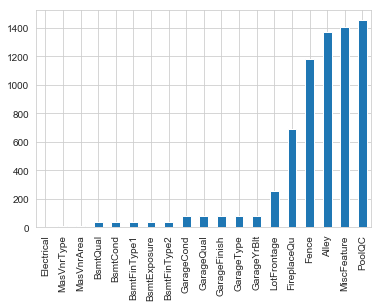

In [12]:
sns.set_style('whitegrid')
missing = train.isnull().sum()
missing = missing[missing >0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [13]:
missing

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [14]:
import scipy.stats as stats

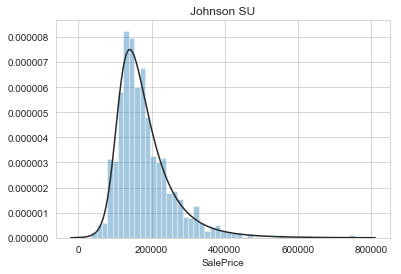

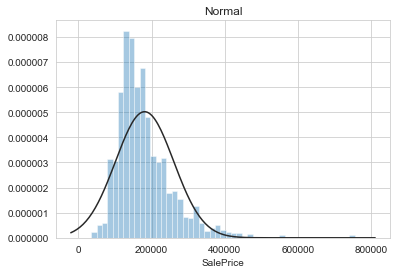

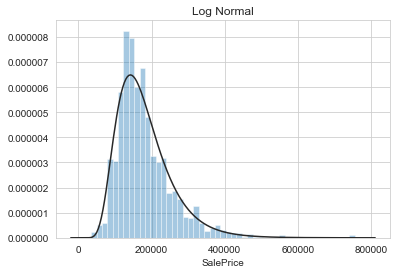

In [15]:
y = train['SalePrice']
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)
plt.show()

It is apparent that SalePrice does <b>NOT</b> follow normal distribution, so before performing regression it has to be transformed. While <b>log transformation</b> does pretty good job, best fit is <b>unbounded Johnson distribution</b>.

In [16]:
def lessThan(value, compare):
    if value < compare:
        return True
    else: 
        return False
    
def greaterThan(value, compare):
    if value > compare:
        return True
    else: 
        return False

In [17]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[quantitative])
normal.apply(test_normality)
not greaterThan(len(normal.any()), 0)

False

In [18]:
normal.any()[normal.any() != True].any()

False

In [19]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o


    

In [20]:
# qual_encoded = []
# for q in qualitative:
#     encode(train, q)
#     qual_encoded.append(q+'_E')
# print(qual_encoded)

In [21]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


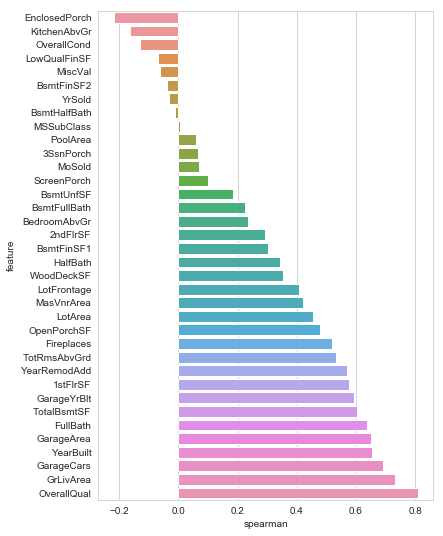

In [22]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x ='spearman', orient='h')
    
features = quantitative #+ qual_encoded 
spearman(train, features)

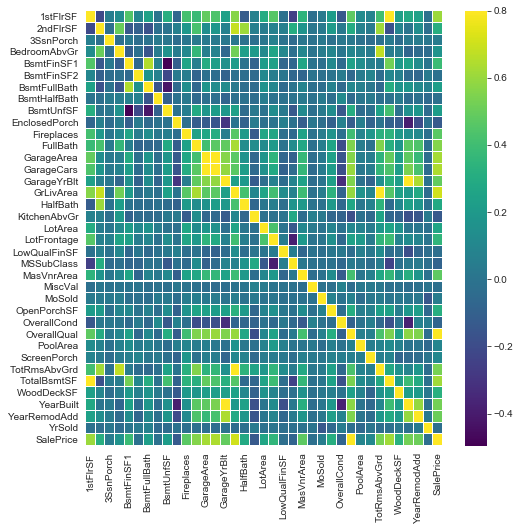

In [23]:
plt.figure(1, figsize=(8, 8))
corr = train[quantitative+['SalePrice']].corr()
sns.heatmap(corr, cmap='viridis', linewidth =0.01,  vmax = 0.8, linecolor="white")
# plt.figure(2, figsize=(8, 8))
# corr = train[qual_encoded+['SalePrice']].corr()
# sns.heatmap(corr, cmap='viridis', linewidth =0.01,  vmax = 0.8, linecolor="white")

In [24]:
# corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])

In [25]:
# for q1 in quantitative+['SalePrice']:
#     for q2 in qual_encoded+['SalePrice']:
#         corr.loc[q1, q2] = train[q1].corr(train[q2])
# plt.figure(figsize=(20, 20))
# sns.heatmap(corr, linewidths=0.01, linecolor='white')

In [26]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [27]:
features =  quantitative #+ qual_encoded
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = train[features].fillna(0.).values
tsne = model.fit_transform(X)


std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmean = KMeans(n_clusters=5)
kmean.fit(pc)


# fr = pd.DataFrame({'tsne1': tsne[:0], 'tsne2': tsne[:1], 'cluster':kmean.labels_})
# fr



KMeans(n_clusters=5)

In [28]:
fr = pd.DataFrame({'tsne1': tsne[:, 0], 'tsne2': tsne[:, 1], 'cluster':kmean.labels_})
fr

,tsne1,tsne2,cluster
0,-8.911693,-19.745813,3
1,5.215394,1.656645,1
2,18.643696,-15.178270,3
3,3.115351,-17.050764,1
4,35.667610,-7.239623,3
...,...,...,...
1455,-11.170562,-14.506127,3
1456,28.820156,2.132039,0
1457,-1.026712,-9.721058,3
1458,1.571747,-0.935338,1


0.9840518602863084


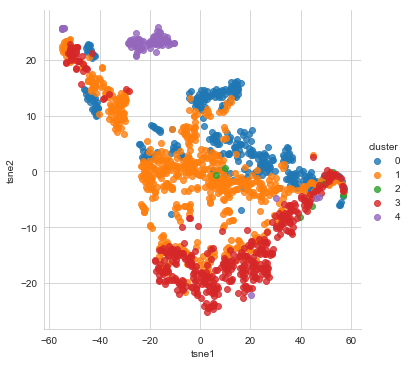

In [29]:
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

## Data Preprocessing

In [30]:
train.drop(['Id'], axis=True, inplace=True)
test.drop(['Id'], axis=True, inplace=True)

In [31]:
percentile = np.percentile(train['GrLivArea'], 99.5)
print(percentile)
train['GrLivArea'].describe()

3431.659999999996


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [32]:
train.shape

(1460, 80)

In [33]:
train = train[train.GrLivArea < 4500] # Remove outliers 
train.reset_index(drop=True, inplace = True)
train['SalePrice'] = np.log1p(train['SalePrice'])
y= train['SalePrice'].reset_index(drop=True)

In [34]:
train.shape

(1458, 80)

In [35]:
y.shape

(1458,)

### Features

In [36]:
train_features = train.drop(['SalePrice'], axis=1)
test_features = test
features = pd.concat([train_features, test_features]).reset_index(drop=True)

In [37]:
features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [38]:
features.shape

(2917, 79)

In [39]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    features[col] = features[col].fillna('None')

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')

features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [40]:
features['MSZoning'].describe()

count     2917
unique       5
top         RL
freq      2265
Name: MSZoning, dtype: object

In [41]:
objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)
features.update(features[objects].fillna('None'))

In [42]:
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [43]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))

In [44]:
from scipy.stats import skew
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

In [45]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics2.append(i)
skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

In [46]:
features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,6.499672,RL,18.144573,13.833055,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,2,2008,WD,Normal
1,4.249693,RL,20.673626,14.117918,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.000000,5,2007,WD,Normal
2,6.499672,RL,18.668047,14.476513,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,9,2008,WD,Normal
3,6.862540,RL,17.249651,14.106197,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,0.0,None,None,None,0.000000,2,2006,WD,Abnorml
4,6.499672,RL,21.314283,15.022008,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.000000,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,9.030083,RM,8.726308,10.765922,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,6,2006,WD,Normal
2913,9.030083,RM,8.726308,10.723223,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,4,2006,WD,Abnorml
2914,4.249693,RL,31.755372,15.820340,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,9,2006,WD,Abnorml
2915,7.337374,RL,17.611139,14.307159,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,MnPrv,Shed,6.937474,7,2006,WD,Normal


In [47]:
features = features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

features['YrBltAndRemod']=features['YearBuilt']+features['YearRemodAdd']
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

In [48]:
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [49]:
features.shape

(2917, 86)

In [50]:
final_features = pd.get_dummies(features).reset_index(drop=True)
final_features.shape

(2917, 309)

In [51]:
X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(y):, :]
X.shape, y.shape, X_sub.shape

((1458, 309), (1458,), (1459, 309))

In [52]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
X = X.drop(overfit, axis=1)
X_sub = X_sub.drop(overfit, axis=1)

In [53]:
X.shape, y.shape, X_sub.shape

((1458, 304), (1458,), (1459, 304))

In [61]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1453    12.072547
1454    12.254868
1455    12.493133
1456    11.864469
1457    11.901590
Name: SalePrice, Length: 1458, dtype: float64

In [58]:
X.to_csv(r'C:\Self-Learning\Kaggle\housePricePrediction\data\train_prepared_features.csv', index=False)
X_sub.to_csv(r'C:\Self-Learning\Kaggle\housePricePrediction\data\test_prepared_features.csv' , index=False)

In [59]:
y.to_csv(r'C:\Self-Learning\Kaggle\housePricePrediction\data\y_train.csv', index=False)

In [60]:
test_Id.to_csv(r'C:\Self-Learning\Kaggle\housePricePrediction\data\test_ids.csv', index=False)